# Task 6: K-Nearest Neighbors (KNN) Classification

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
file_path = 'Iris.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to confirm structure
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.drop(columns=['Id'])  # Drop ID column if present

X = df.drop(columns=['Species'])
y = df['Species']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

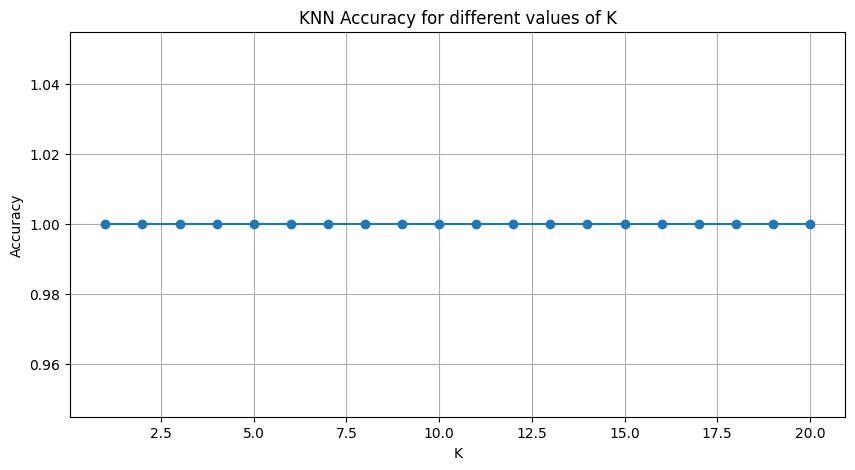

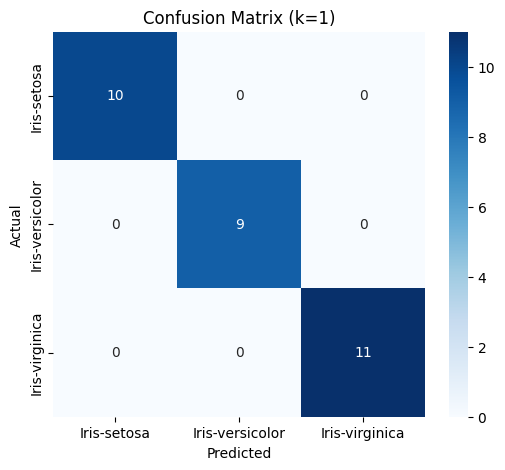

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Experiment with different values of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs K
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy for different values of K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Step 4: Confusion matrix for best K
best_k = k_values[np.argmax(accuracies)]
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title(f'Confusion Matrix (k={best_k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


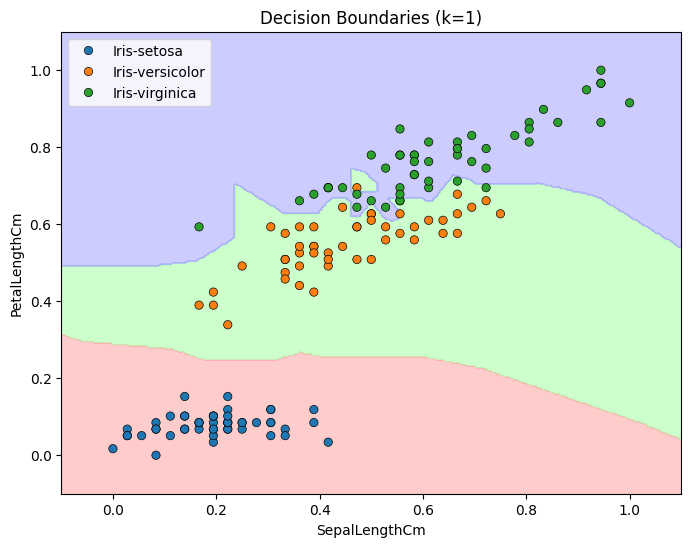

In [10]:
# Visualize decision boundaries (2D using only 2 features)
feature1 = 0  # SepalLengthCm
feature2 = 2  # PetalLengthCm

# Encode target labels to numeric
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Redo 2D feature extraction
X_vis = X_scaled[:, [feature1, feature2]]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_encoded, test_size=0.2, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

# Create meshgrid
x_min, x_max = X_vis[:, 0].min() - 0.1, X_vis[:, 0].max() + 0.1
y_min, y_max = X_vis[:, 1].min() - 0.1, X_vis[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict using the meshgrid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.6)

# Scatter original points using string labels again
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=le.inverse_transform(y_encoded), edgecolor='k')
plt.xlabel(df.columns[feature1])
plt.ylabel(df.columns[feature2])
plt.title(f'Decision Boundaries (k={best_k})')
plt.show()